## 1 Particle

┌ Info: Saved animation to 
│   fn = /Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif
└ @ Plots /Users/sheehanolver/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif")
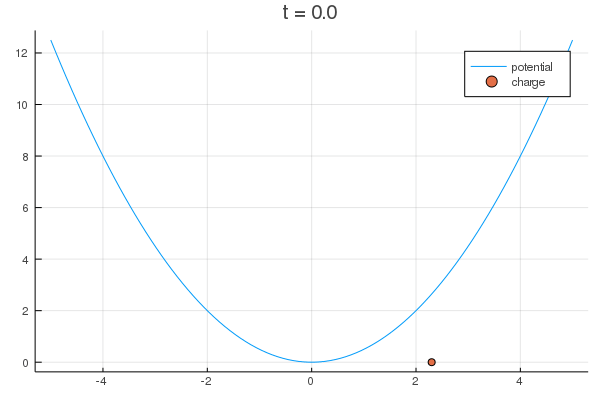

In [2]:
using DifferentialEquations, StaticArrays, Plots

V = x -> x^2/2  # Potential
Vp = x -> x     # Force

λ_0 = 2.3  # initial location
v_0 = 1.2  # initial position
γ = 1.0    # damping

λv = solve(ODEProblem(((λ,v),_,t) -> SVector(v,-Vp(λ) - γ*v), SVector(λ_0,v_0), (0.0, 20.0)); reltol=1E-6);

@gif for t=0.0:0.05:7.0
    plot(V, range(-5, stop=5, length=100); label="potential", title="t = $t")
    scatter!([first(λv(t))] ,[0.0]; label="charge")
end

## 2 Particles, No potential or friction

In [9]:
N = 2
λ_0 = [1.2,2.3]  # initial location
v_0 = zero(λ_0) # initial velocity
prob = ODEProblem(function(λv,_,t) 
        λ = λv[1:N]
        v = λv[N+1:end]
        [v; 1/(λ[1] - λ[2]); 1/(λ[2] - λ[1])]
        end, [λ_0; v_0], (0.0, 10.0))
λv = solve(prob; reltol=1E-6);

┌ Info: Saved animation to 
│   fn = /Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif
└ @ Plots /Users/sheehanolver/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif")
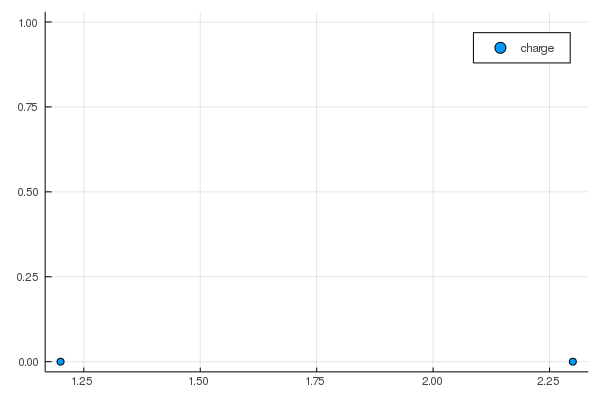

In [12]:
@gif for t=0.0:0.05:7.0
    scatter(λv(t)[1:N] ,zeros(N); label="charge")
end

## 2 Particles in potential well

In [15]:
N = 2

V = x -> x^2/2  # Potential
Vp = x -> x     # Force
γ = 1.0    # damping



λ_0 = [1.2,2.3]  # initial location
v_0 = zero(λ_0) # initial velocity
prob = ODEProblem(function(λv,_,t) 
        λ = λv[1:N]
        v = λv[N+1:end]
        [v; 1/(λ[1] - λ[2]) - Vp(λ[1]) - γ*v[1]; 1/(λ[2] - λ[1])  - Vp(λ[2]) - γ*v[2]]
        end, [λ_0; v_0], (0.0, 20.0))
λv = solve(prob; reltol=1E-6);

┌ Info: Saved animation to 
│   fn = /Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif
└ @ Plots /Users/sheehanolver/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif")
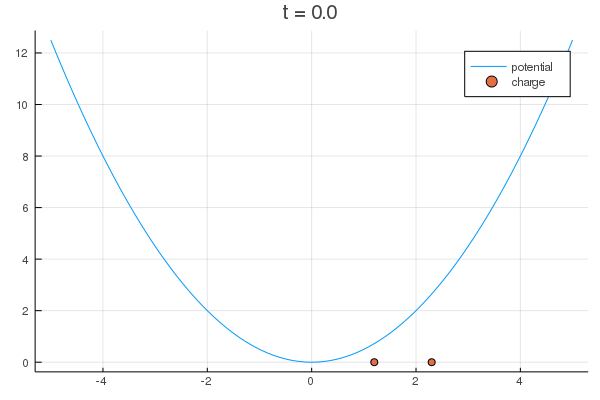

In [16]:
@gif for t=0.0:0.05:20.0
    plot(V, range(-5, stop=5, length=100); label="potential", title="t = $t")
    scatter!(λv(t)[1:N] ,zeros(N); label="charge")
end

## N Particles in potential well

In [18]:
N = 100

V = x -> x^2/2  # Potential
Vp = x -> x     # Force

λ_0 = randn(N)  # initial location
v_0 = randn(N)  # initial velocity
γ = 1.0    # damping


prob = ODEProblem(function(λv,_,t) 
        λ = λv[1:N]
        v = λv[N+1:end]
        [v; [sum(1 ./ (λ[k] .- λ[[1:k-1;k+1:end]])) - Vp(λ[k]) -  γ*v[k] for k=1:N]]
        end, [λ_0; v_0], (0.0, 20.0))
λv = solve(prob; reltol=1E-6);

┌ Info: Saved animation to 
│   fn = /Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif
└ @ Plots /Users/sheehanolver/.julia/packages/Plots/qZHsp/src/animation.jl:98


Plots.AnimatedGif("/Users/sheehanolver/Documents/Lectures/M3M6AppliedComplexAnalysis/demos/tmp.gif")
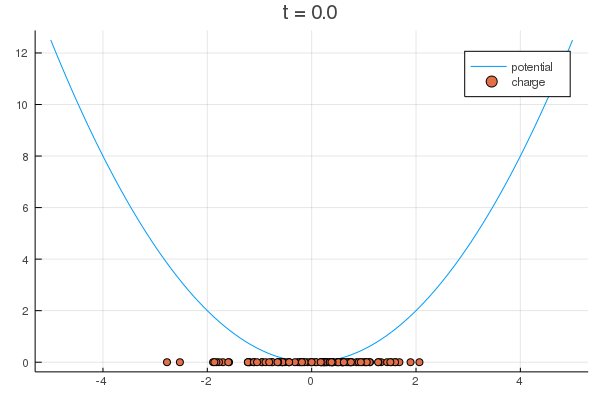

In [19]:
@gif for t=0.0:0.05:20.0
    plot(V, range(-5, stop=5, length=100); label="potential", title="t = $t")
    scatter!(λv(t)[1:N] ,zeros(N); label="charge")
end

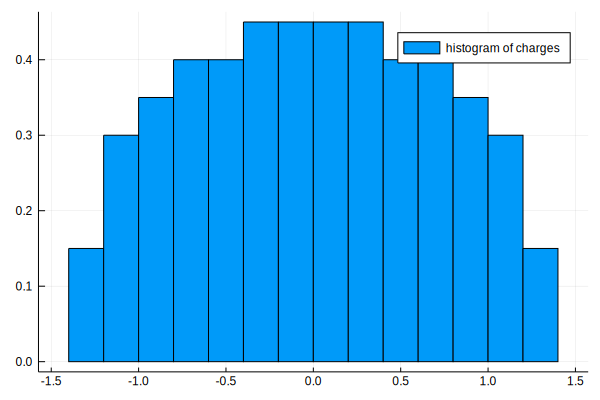

In [22]:
histogram(λv(10.0)[1:N]/sqrt(N); nbins=20, normalize=true, label="histogram of charges")